### Read the data

In [1]:
with open('data.txt', 'r', encoding='utf-8') as file:
    text = file.read()

### Data preprocessing

### 1. Data cleaning

In [2]:
import re

pattern = r"""[!"#$%&'()*+,-./:;<=>?@[\]\\^_`{|}~]|[0-9]+|[^\u0000-\u007f]+"""
text = re.sub(pattern, "", text)
text = re.sub(r'\n+', '\n', text)
text = re.sub(r" [b-zB-Z] ", "", text)
text[:1000]

'Project Gutenbergs The Adventures of Sherlock Holmes by Arthur Conan Doyle\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever  You may copy it give it away or\nreuse it under the terms of the Project Gutenberg License included\nwith this eBook or online at wwwgutenbergnet\nTitle The Adventures of Sherlock Holmes\nAuthor Arthur Conan Doyle\nRelease Date November   EBook \nLast Updated May  \nLanguage English\nCharacter set encoding UTF\n START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES \nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\ncover\nThe Adventures of Sherlock Holmes\nby Arthur Conan Doyle\nContents\n      A Scandal in Bohemia\n   II    The RedHeaded League\n   III   A Case of Identity\n   IV    The Boscombe Valley Mystery\n      The Five Orange Pips\n   VI    The Man with the Twisted Lip\n   VII   The Adventure of the Blue Carbuncle\n   VIII  The Adventure of the Speckled Band\n   

### Data 2. formating

In [3]:
data = ""
for i in text.split('\n'):
  if len(i) != 0:
    data=data+i.strip()+" \n "

In [4]:
data[:1000]

'Project Gutenbergs The Adventures of Sherlock Holmes by Arthur Conan Doyle \n This eBook is for the use of anyone anywhere at no cost and with \n almost no restrictions whatsoever  You may copy it give it away or \n reuse it under the terms of the Project Gutenberg License included \n with this eBook or online at wwwgutenbergnet \n Title The Adventures of Sherlock Holmes \n Author Arthur Conan Doyle \n Release Date November   EBook \n Last Updated May \n Language English \n Character set encoding UTF \n START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES \n Produced by an anonymous Project Gutenberg volunteer and Jose Menendez \n cover \n The Adventures of Sherlock Holmes \n by Arthur Conan Doyle \n Contents \n A Scandal in Bohemia \n II    The RedHeaded League \n III   A Case of Identity \n IV    The Boscombe Valley Mystery \n The Five Orange Pips \n VI    The Man with the Twisted Lip \n VII   The Adventure of the Blue Carbuncle \n VIII  The Adventure of the Speck

### 3. Text tokenization

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size_limit = 5000
tokenizer=Tokenizer(num_words=vocab_size_limit)
tokenizer.fit_on_texts([data])

In [6]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'a': 5,
 'in': 6,
 'it': 7,
 'you': 8,
 'that': 9,
 'he': 10,
 'was': 11,
 'his': 12,
 'is': 13,
 'my': 14,
 'with': 15,
 'at': 16,
 'as': 17,
 'for': 18,
 'which': 19,
 'had': 20,
 'have': 21,
 'not': 22,
 'be': 23,
 'me': 24,
 'i': 25,
 'but': 26,
 'we': 27,
 'this': 28,
 'from': 29,
 'there': 30,
 'upon': 31,
 'holmes': 32,
 'said': 33,
 'she': 34,
 'her': 35,
 'him': 36,
 'so': 37,
 'your': 38,
 'very': 39,
 'all': 40,
 'been': 41,
 'on': 42,
 'no': 43,
 'by': 44,
 'one': 45,
 'are': 46,
 'what': 47,
 'were': 48,
 'an': 49,
 'then': 50,
 'out': 51,
 'up': 52,
 'would': 53,
 'has': 54,
 'man': 55,
 'into': 56,
 'mr': 57,
 'who': 58,
 'or': 59,
 'little': 60,
 'do': 61,
 'some': 62,
 'when': 63,
 'if': 64,
 'will': 65,
 'down': 66,
 'our': 67,
 'now': 68,
 'could': 69,
 'see': 70,
 'they': 71,
 'us': 72,
 'may': 73,
 'over': 74,
 'about': 75,
 'more': 76,
 'well': 77,
 'any': 78,
 'other': 79,
 'come': 80,
 'only': 81,
 'before': 82,
 'than'

In [7]:
voc_size = len(tokenizer.word_index)
print("Vocabulary Size:", voc_size)

Vocabulary Size: 10247


In [8]:
import pickle

with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

### 4. Create input sequence

In [8]:
input_sequence = []
for i in text.split('\n'):
  if len(i) != 0:
    tokenized_sentence = tokenizer.texts_to_sequences([i])[0]
    for i in range(1,len(tokenized_sentence)):
            input_sequence.append(tokenized_sentence[:i+1])

In [9]:
input_sequence

[[131, 4729],
 [131, 4729, 1],
 [131, 4729, 1, 921],
 [131, 4729, 1, 921, 3],
 [131, 4729, 1, 921, 3, 116],
 [131, 4729, 1, 921, 3, 116, 32],
 [131, 4729, 1, 921, 3, 116, 32, 44],
 [131, 4729, 1, 921, 3, 116, 32, 44, 528],
 [131, 4729, 1, 921, 3, 116, 32, 44, 528, 2089],
 [131, 4729, 1, 921, 3, 116, 32, 44, 528, 2089, 2090],
 [28, 922],
 [28, 922, 13],
 [28, 922, 13, 18],
 [28, 922, 13, 18, 1],
 [28, 922, 13, 18, 1, 251],
 [28, 922, 13, 18, 1, 251, 3],
 [28, 922, 13, 18, 1, 251, 3, 358],
 [28, 922, 13, 18, 1, 251, 3, 358, 2091],
 [28, 922, 13, 18, 1, 251, 3, 358, 2091, 16],
 [28, 922, 13, 18, 1, 251, 3, 358, 2091, 16, 43],
 [28, 922, 13, 18, 1, 251, 3, 358, 2091, 16, 43, 1548],
 [28, 922, 13, 18, 1, 251, 3, 358, 2091, 16, 43, 1548, 2],
 [28, 922, 13, 18, 1, 251, 3, 358, 2091, 16, 43, 1548, 2, 15],
 [529, 43],
 [529, 43, 3244],
 [529, 43, 3244, 3245],
 [529, 43, 3244, 3245, 8],
 [529, 43, 3244, 3245, 8, 73],
 [529, 43, 3244, 3245, 8, 73, 743],
 [529, 43, 3244, 3245, 8, 73, 743, 7],
 [52

In [10]:
max_len = max([len(x) for x in input_sequence])
max_len

17

### 5. Pad input sequence generation

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequence = pad_sequences(input_sequence, maxlen = max_len, padding='pre')

In [12]:
padded_input_sequence

array([[   0,    0,    0, ...,    0,  131, 4729],
       [   0,    0,    0, ...,  131, 4729,    1],
       [   0,    0,    0, ..., 4729,    1,  921],
       ...,
       [   0,    0,    0, ...,    4,  366,   75],
       [   0,    0,    0, ...,  366,   75,  318],
       [   0,    0,    0, ...,   75,  318, 1544]])

### 6. Splitting pad input sequence into input and target variable

In [13]:
x= padded_input_sequence[:,:-1]
y = padded_input_sequence[:,-1]

In [14]:
x.shape,y.shape

((87620, 16), (87620,))

### 7. One hot code encoding of target variable

In [15]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y,num_classes=voc_size+1)

### 8. Train test split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Building LSTM Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input

model = Sequential()
model.add(Input(shape=(max_len - 1,)))
model.add(Embedding(voc_size + 1, 100))
model.add(LSTM(256))
model.add(Dense(voc_size + 1, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 16, 100)             │       1,024,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10248)               │       2,633,736 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,024,104 (15.35 MB)

 Trainable params: 4,024,104 (15.35 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30,batch_size=32)

Epoch 1/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 196s 85ms/step - accuracy: 0.0687 - loss: 6.5519 - val_accuracy: 0.0974 - val_loss: 5.8816
Epoch 2/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 188s 86ms/step - accuracy: 0.1073 - loss: 5.6152 - val_accuracy: 0.1194 - val_loss: 5.6300
Epoch 3/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.1357 - loss: 5.1917 - val_accuracy: 0.1307 - val_loss: 5.5524
Epoch 4/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 188s 86ms/step - accuracy: 0.1580 - loss: 4.8014 - val_accuracy: 0.1368 - val_loss: 5.5505
Epoch 5/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.1773 - loss: 4.4557 - val_accuracy: 0.1365 - val_loss: 5.6345
Epoch 6/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 182s 83ms/step - accuracy: 0.2019 - loss: 4.0820 - val_accuracy: 0.1347 - val_loss: 5.7617
Epoch 7/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 183s 83ms/step - accuracy: 0.2389 - loss: 3.7144 - val_accuracy: 0.1346 - val_loss: 5.9247
Epoch 8/30
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 181s 82ms/step - accuracy: 

### Training accuracy and loss plots

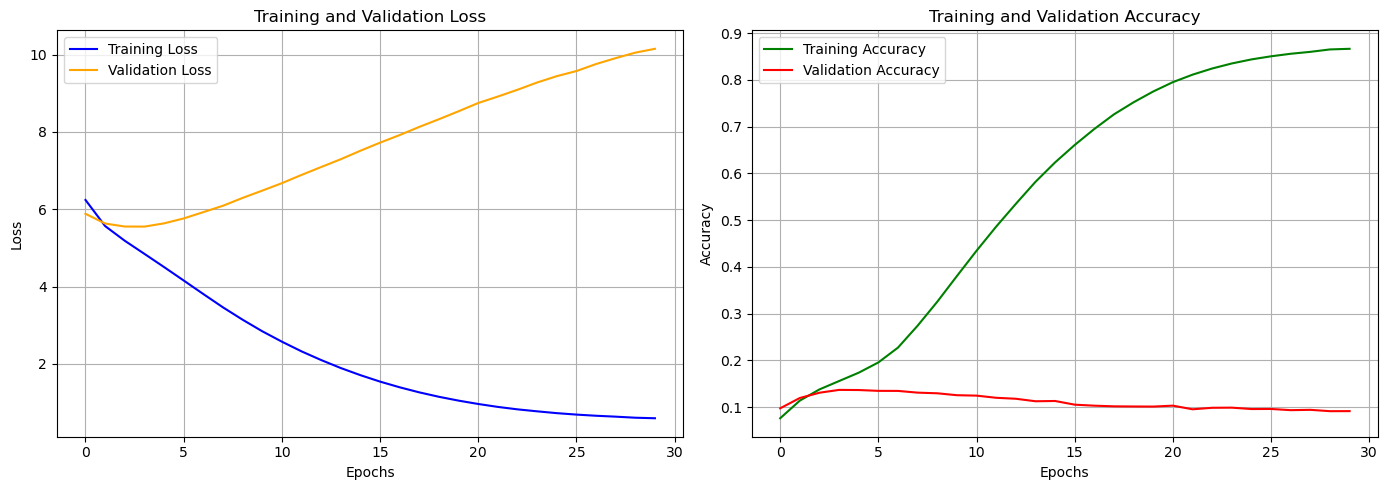

In [20]:
import matplotlib.pyplot as plt

# Create subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Training and Validation Loss
axs[0].plot(history.history['loss'], label='Training Loss', color='blue')
axs[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot Training and Validation Accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy', color='green')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Save the model

In [21]:
model.save('final_model1.h5')

### Evaluate the model

In [1]:
model.evaluate(x_test, y_test)

2902/2902 ━━━━━━━━━━━━━━━━━━━━ 57s 19ms/step - accuracy: 0.8984 - loss: 0.3952
[0.3870079517364502, 0.8992642760276794]
